## Homework 3
From Chapter 4, found on pages 196-197 of ISLP

*This question should be answered using the `Weekly` data set, which is part of the ISLP package. This data is similar in nature to the Smarket data from this section's in-class exercises, except that it contains 1089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.*

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm

# Import specific objects
from ISLP.models import (ModelSpec as MS,
                         summarize)
from ISLP import load_data
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
Weekly = load_data('Weekly')
Weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


a) Produce some numerical and graphical summaries of the `Weekly` data. Do there appear to be any patterns?

- Based on the provided code and visualizations, here are some observations regarding patterns in the Weekly data:
    - Time Series Plot: The time series plot of weekly volume over time shows fluctuations in volume but does not exhibit a clear trend or seasonality. This suggests that the volume of trades fluctuates randomly over time without any discernible pattern.

    - Box Plot: The box plot of weekly volume by direction (Up and Down) shows that there are differences in the distribution of volume between the two directions. However, the median volume for both directions seems to be relatively similar, indicating that the direction of the market may not have a strong influence on the volume of trades.

    - Pair Plot: The pair plot provides a visual representation of the relationships between variables (Volume, Today, Direction). It does not show any distinct patterns or strong correlations between these variables.

- Overall, based on these visualizations, there doesn't appear to be any clear, consistent patterns in the Weekly data. The volume of trades fluctuates randomly over time, and there are no strong relationships between volume, direction, and other variables.

              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75% 

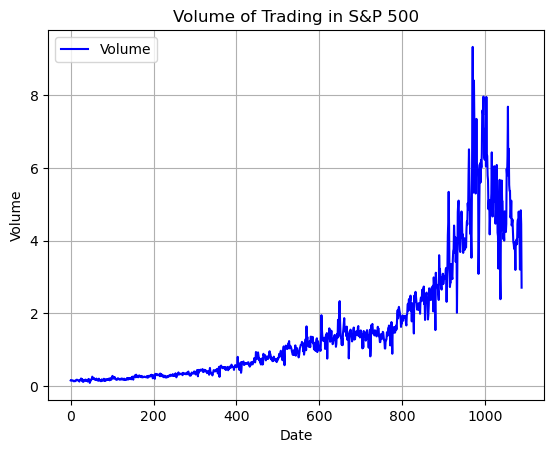

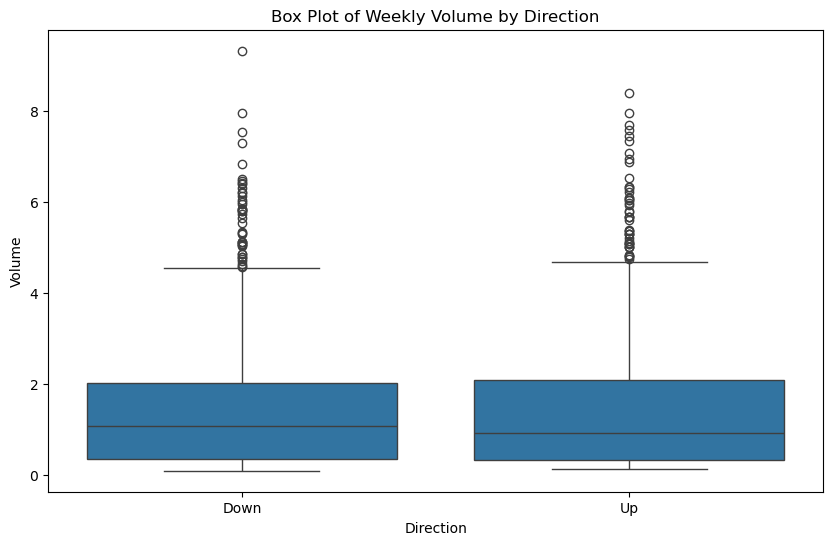

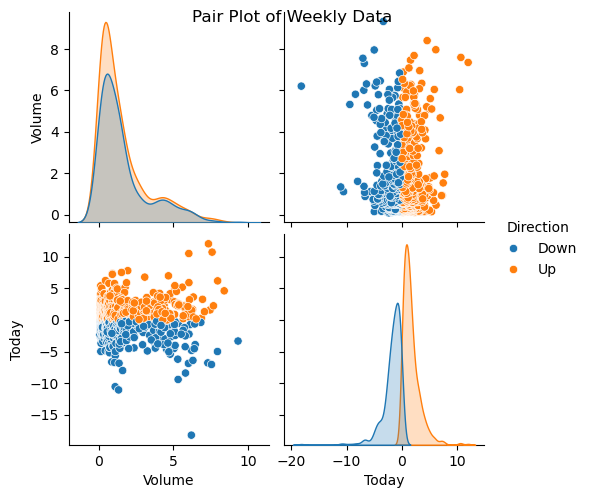

In [11]:
#Add your code here
from pprint import pprint
data = Weekly
# Summary statistics
pprint(data.describe())

# Time series plot
# Plotting the data
plt.plot(data.index, data['Volume'], color='blue', label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume of Trading in S&P 500')
plt.legend()
plt.grid(True)
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Direction', y='Volume', data=data)
plt.xlabel('Direction')
plt.ylabel('Volume')
plt.title('Box Plot of Weekly Volume by Direction')
plt.show()

# Pair plot
sns.pairplot(data[['Volume', 'Today', 'Direction']], hue='Direction', diag_kind='kde')
plt.suptitle('Pair Plot of Weekly Data')
plt.show()



b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Do not forget to drop missing values due to lag creation. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

- Yes.
- Based on the logistic regression results:
    - The intercept('const') and Lag2 are statistically significant predictors as their p-values associated with coefficients are less than 0.05.

In [22]:
#Add your code here
# Drop missing values resulting from lag creation
data = data.dropna()
# print(data.dtypes)

target_variable = 'Direction'
predictors = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
X = data[predictors]
# !! Get y coverted to binary values !!
y = data[target_variable].map({'Up': 1, 'Down': 0}).values
logit_model = sm.Logit(y, sm.add_constant(X))
result = logit_model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Wed, 05 Jun 2024   Pseudo R-squ.:                0.006580
Time:                        16:19:42   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression
- The confusion matrix indicates the following:
    - Predicted 0 (Negative Class): 54 instances were correctly predicted as belonging to the negative class.
    - Predicted 1 (Positive Class): 557 instances were correctly predicted as belonging to the positive class.
    - False Negatives (Type II Error): 48 instances were incorrectly predicted as negative when they were actually positive.
    - False Positives (Type I Error): 430 instances were incorrectly predicted as positive when they were actually negative.
- The overall fraction of correct predictions (Accuracy) is approximately 0.56, indicating that the model correctly predicted the class label for about 56% of the instances in the dataset.

In [27]:
#Add your code here
from sklearn.metrics import confusion_matrix, accuracy_score

# Make predictions using the logistic regression model
y_pred = result.predict(sm.add_constant(X))
# print(y_pred) # values are float, need to be rounded
# In scikit-learn, when you use the predict method on a logistic regression model, 
# it automatically gives you the predicted classes (0 or 1) based on a default threshold of 0.5.

# Make predictions using the logistic regression model
predicted_classes = y_pred.round().astype(int) 
# Round y_pred probabilities to nearest integer

# Compute confusion matrix
cm = confusion_matrix(y, predicted_classes)

# Compute overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y, predicted_classes)

print("Confusion Matrix:")
# Convert confusion matrix to DataFrame
conf_matrix_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
print(conf_matrix_df)
print("\nOverall Fraction of Correct Predictions (Accuracy):", accuracy)

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           54          430
Actual 1           48          557

Overall Fraction of Correct Predictions (Accuracy): 0.5610651974288338


d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [41]:
#Add your code here
from sklearn.metrics import classification_report
# Filter the data for training and testing periods
train_data = data[data['Year'] <= 2008]
test_data = data[data['Year'] >= 2009]
predictor = 'Lag2'
# Select predictor and target variables for training and testing
X_train = train_data[[predictor]]
y_train = train_data[target_variable].map({'Up': 1, 'Down': 0}).values
X_test = test_data[[predictor]]
y_test = test_data[target_variable].map({'Up': 1, 'Down': 0}).values

# print(len(train_data))
# Initialize the logistic regression model
logistic_model = LogisticRegression(solver='liblinear')
# In scikit-learn, the solver parameter in the LogisticRegression class specifies the algorithm used to optimize the logistic regression model. The choice of solver can affect the performance and efficiency of the model fitting process. 
# Here are the reasons why we might use solver='liblinear':
# 1) Small to Medium-Sized Datasets: The liblinear solver is particularly well-suited for small to medium-sized datasets. It uses a coordinate descent algorithm, which can be efficient for these dataset sizes.
# 2) Binary Classification: liblinear is specifically designed for binary classification problems, where the target variable has only two classes (e.g., predicting whether the market will go up or down).
# 3) Convergence and Speed: For certain types of problems, liblinear can converge faster and more reliably compared to other solvers. It often performs well with simple, linear problems.
# 4) Regularization: liblinear supports both L1 (Lasso) and L2 (Ridge) regularization, which can be useful for preventing overfitting, especially in cases where the number of features is large relative to the number of observations.
# 5)Compatibility: Some other solvers, like sag and saga, are more suited for larger datasets and may not perform as well with smaller datasets or when the number of samples is much smaller than the number of features.

# Fit the logistic regression model
logistic_model.fit(X_train, y_train)

# Different from sm.logit,
# In scikit-learn, when you use the predict method on a logistic regression model, 
# it automatically gives you the predicted classes (0 or 1) based on a default threshold of 0.5.
# Make predictions using the logistic regression model
# predicted_classes = y_pred.round().astype(int) 
# Round y_pred probabilities to nearest integer

# Print the coefficients of the model
print(f"Intercept: {logistic_model.intercept_[0]}")
print(f"Lag2 Coefficient: {logistic_model.coef_[0][0]}")

# Make predictions
y_pred = logistic_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, predicted_classes)

print("Confusion Matrix:")
# Convert confusion matrix to DataFrame
conf_matrix_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
print(conf_matrix_df)
print("\nOverall Fraction of Correct Predictions (Accuracy):", accuracy)

Intercept: 0.2024255121115545
Lag2 Coefficient: 0.058063730867047296
              precision    recall  f1-score   support

           0       0.64      0.21      0.32        43
           1       0.62      0.92      0.74        61

    accuracy                           0.62       104
   macro avg       0.63      0.56      0.53       104
weighted avg       0.63      0.62      0.57       104

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0            9           34
Actual 1            5           56

Overall Fraction of Correct Predictions (Accuracy): 0.625


e) Use KNN with K = 1.

In [34]:
#Add your code here
from sklearn.neighbors import KNeighborsClassifier
# Fit KNN model with K=1
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
# Predict class labels for test data
y_pred_knn = knn_model.predict(X_test)

# Compute confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Compute overall fraction of correct predictions (Accuracy)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print confusion matrix and accuracy
print("Confusion Matrix (KNN with K=1):")
# Convert confusion matrix to DataFrame
cm_knn_df = pd.DataFrame(cm_knn, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
print(cm_knn_df)
print("\nOverall Fraction of Correct Predictions (Accuracy) (KNN with K=1):", accuracy_knn)

Confusion Matrix (KNN with K=1):
          Predicted 0  Predicted 1
Actual 0           21           22
Actual 1           30           31

Overall Fraction of Correct Predictions (Accuracy) (KNN with K=1): 0.5


Best k value: 27


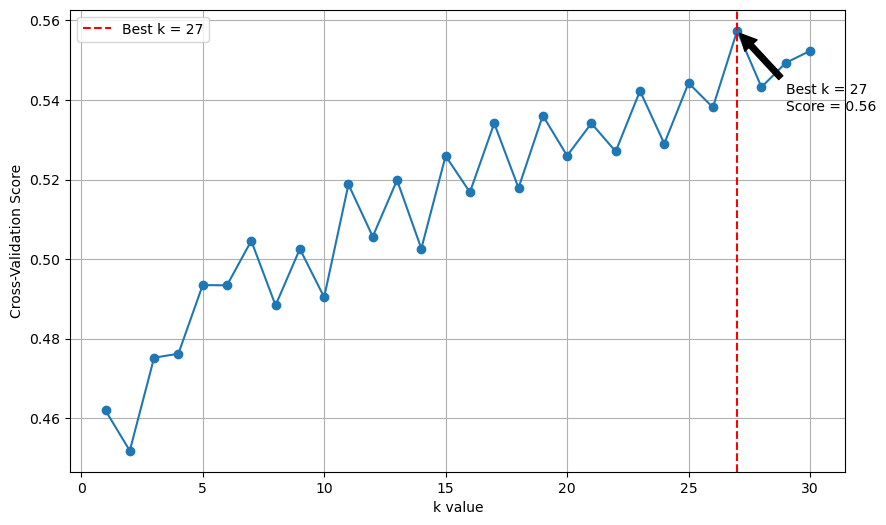

In [36]:
# Extension:
# K=1 only gets an accuracy of 0.5
# Try to find the best K
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Define the range of k values to test
k_range = range(1, 31)
dataset_name ='Weekly'
# Store cross-validation scores for each k value
k_scores = []

# Perform cross-validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
# print(len(k_scores)) #30
# Find the best k value
best_k = k_range[np.argmax(k_scores)]
print(f"Best k value: {best_k}")

# Plot the relationship between k values and cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('k value')
plt.ylabel('Cross-Validation Score')
plt.title=f'k value vs. Cross-Validation Score\n({dataset_name} Dataset)'
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k = {best_k}')
plt.legend()
plt.grid(True)
plt.annotate(f'Best k = {best_k}\nScore = {max(k_scores):.2f}',
             xy=(best_k, max(k_scores)),
             xytext=(best_k + 2, max(k_scores) - 0.02),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()



Best k value: 34


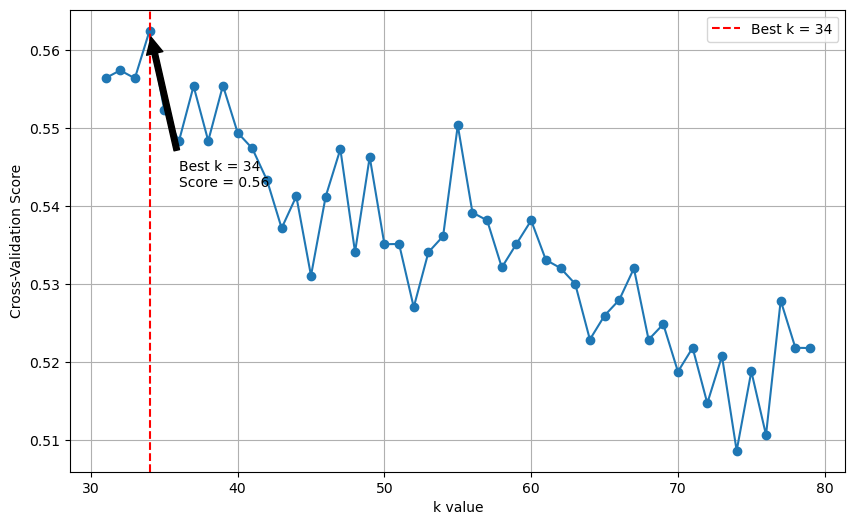

In [39]:
# expanding K-range further: 
# Determine if the dataset is large or small based on the length of X_train
# X_train is slightly less than 1000 rows, k_range from 10 to 50 is usually
# suitable for large datasets more than 1000 rows.
k_range = range(31,80)
dataset_name ='Weekly'
# Store cross-validation scores for each k value
k_scores = []

# Perform cross-validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
# print(len(k_scores)) #30
# Find the best k value
best_k = k_range[np.argmax(k_scores)]
print(f"Best k value: {best_k}")

# Plot the relationship between k values and cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('k value')
plt.ylabel('Cross-Validation Score')
plt.title=f'k value vs. Cross-Validation Score\n({dataset_name} Dataset)'
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k = {best_k}')
plt.legend()
plt.grid(True)
plt.annotate(f'Best k = {best_k}\nScore = {max(k_scores):.2f}',
             xy=(best_k, max(k_scores)),
             xytext=(best_k + 2, max(k_scores) - 0.02),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()


If k < 80, the highest accuracy happens when k =34, the accuracy is keeping comparatively low uisng KNN. 


Additional Practice Questions: 
- ## Explain the difference between KNN, LogisticRegression and sm.Logit to a non-technical audience. 

_My answer_

*Let's imagine we're trying to predict whether it will rain next week (Yes or No) based on some weather data we have collected this week. We'll use three different methods to make our predictions: KNN, Logistic Regression, and sm.Logit. Here's a simple explanation of how each method works:

**K-Nearest Neighbors (KNN)**

_Analogy:_ Imagine you want to decide if you should carry an umbrella next week based on what your neighbors did when the weather was similar.

_How it works:_

- Neighbors: KNN looks at the weather data for the closest 'neighbors' to the current week. If we set K to 3, it looks at the 3 most similar weeks from the past.

- Decision: It checks if it rained in those 3 weeks. If 2 out of 3 weeks had rain, it predicts rain for next week too.

_Summary:_ KNN is like asking your neighbors what happened during similar weather and deciding based on their experiences.

**Logistic Regression**

_Analogy:_ Think of Logistic Regression as having a weather expert who uses a formula to give you the probability of rain.

_How it works:_

- Formula: The expert has studied past weather data and created a formula that considers various factors like temperature, humidity, and wind speed.

- Probability: The expert uses this formula to calculate the probability that it will rain next week. If the probability is higher than a certain threshold (say 50%), the expert predicts rain.

_Summary_: Logistic Regression uses a statistical formula to predict the likelihood of rain based on past weather data.

**sm.Logit**

_Analogy_: sm.Logit is very similar to Logistic Regression but think of it as using a slightly different mathematical approach to get the same kind of predictions.

_How it works:_

- Mathematical Approach: sm.Logit also looks at past data and uses a formula, but it's calculated using a method from a specific statistical library (statsmodels).

- Probability: Like Logistic Regression, it gives a probability of rain and makes a prediction based on that.

_Summary_: sm.Logit is another expert with a slightly different formula but aims to give you the same kind of prediction about the rain.

**Key Differences**

- KNN is based on finding similar past cases and making a decision based on those.

- Logistic Regression and sm.Logit use a mathematical formula to predict the likelihood of rain, but the difference lies in how this formula is derived and applied. Logistic Regression is a more general term, while sm.Logit refers specifically to a method from a particular statistical package.

- In the context of the 'Weekly' dataset (let's assume it has weekly weather data), all three methods will use this dataset to learn from the past weeks and make predictions for future weeks.

    - KNN would look at past weeks that have similar weather to the current week.
    - Logistic Regression would use a statistical formula based on all the past weeks to give a probability of rain.
    - sm.Logit would do the same as Logistic Regression but using a method from a specific library to derive the formula.

- Each method has its strengths and is used in different scenarios based on the nature of the data and the specific requirements of the prediction task.

- ## How would you describe this exercise in an interview to both a technical and non-technical interviewer?

_My answer based on the 'Weekly' dataset_

- **To a non-technical interviewer:**

    - We're essentially exploring how historical data can help predict future stock market movements. Imagine you're trying to predict whether the stock market will go up or down tomorrow. This exercise involves using past stock market data, like performance over the last five weeks and trading volume, to create a model that can make those predictions. It's like looking at patterns in the past to try and forecast what might happen in the future.

- **To a technical interviewer:**

    - In this exercise, we're employing various machine learning techniques, including logistic regression and k-nearest neighbors (KNN), to analyze historical stock market data. We're using features such as lagged performance and trading volume to predict future stock market movements. The goal is to build models that can accurately classify whether the market will go up or down based on these historical patterns. We'll evaluate the performance of these models using metrics like accuracy and confusion matrices.

- ## What are the key insights you would want to show? 

_My answer based on the 'Weekly' dataset_

- How well do our models do?: We want to see if our methods can predict stock market movements better than just guessing randomly.

- Which factors matter most?: We're looking at what information (like past performance or trading volume) helps us make better predictions.

- Comparing different ways of predicting: We're trying out different techniques to see which one works best for this job.

- How useful are our predictions?: We're checking if our predictions can actually help someone make better decisions about buying or selling stocks.

- Making sure our predictions are reliable: We're testing if our methods work consistently, not just by chance, so they can be trusted in real-life situations.


- ## Can you think of a business context where this exercise would have applications?

_My answer based on the 'Weekly' dataset_

- **Financial Sector:**

    - Stock Market Prediction: Predicting stock price movements based on historical market data to inform investment decisions.
    - Credit Risk Assessment: Using past financial data to assess the creditworthiness of individuals or businesses and predict the likelihood of default.
    - Fraud Detection: Identifying potentially fraudulent transactions or activities by analyzing patterns in financial data.

- **Healthcare Industry:**

    - Disease Prediction: Predicting the likelihood of disease occurrence or progression based on patient data and medical history.
    - Patient Outcome Prediction: Forecasting patient outcomes following certain medical treatments or procedures to assist in treatment planning.
    - Healthcare Resource Allocation: Optimizing resource allocation by predicting patient admission rates, length of stay, or readmission likelihood.

- **Marketing and E-commerce:**

    - Customer Segmentation: Segmenting customers based on their behavior, preferences, and demographics to tailor marketing campaigns.
    - Churn Prediction: Predicting the likelihood of customer churn or attrition to implement retention strategies.
    - Recommendation Systems: Recommending products or services to customers based on their past behavior and preferences.

- **Manufacturing and Supply Chain Management:**

    - Demand Forecasting: Predicting future demand for products to optimize inventory levels and production schedules.
    - Quality Control: Identifying defects or anomalies in manufacturing processes based on historical data to improve product quality.
    - Supply Chain Optimization: Optimizing supply chain operations by predicting supplier lead times, transportation costs, and inventory requirements.

- These are just a few examples, but predictive modeling techniques like logistic regression and KNN can be applied across various industries to solve a wide range of business problems and improve decision-making processes.